In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Mais EDOs

Agora, vamos resolver uma EDO que não tem solução analítica:
$$ \begin{cases} y'(t) = - y(t) + 2\sin(t^2) \\ y(0) = 1.2\end{cases} $$

Será que o mesmo algoritmo funciona?

In [2]:
### Começar com código (notebook!) copiado da aula passada, e mudar
### Resposta aqui


In [3]:
T = 10
y0 = 1.2

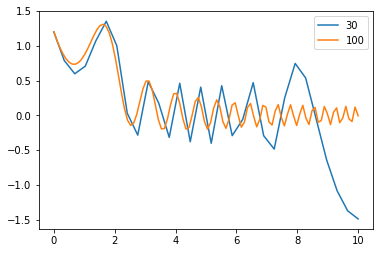

In [4]:
t30,  y30  = eulerexplicito(T, 30,  y0)
t100, y100 = eulerexplicito(T, 100, y0)
plt.plot(t30,  y30,  label='30')
plt.plot(t100, y100, label='100')
plt.legend()
# Comentar
plt.show()

Mais precisão: passos menores

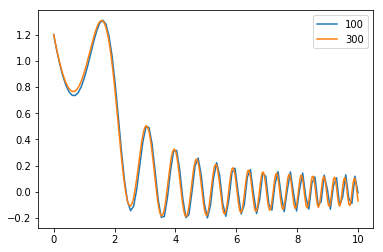

In [5]:
t300,  y300  = eulerexplicito(T, 300,  y0)
plt.plot(t100, y100, label='100')
plt.plot(t300, y300, label='300')
plt.legend()
plt.show()

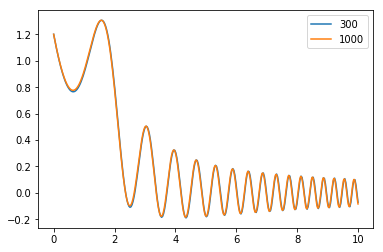

In [6]:
t1000, y1000 = eulerexplicito(T, 1000, y0)
plt.plot(t300,  y300,  label='300')
plt.plot(t1000, y1000, label='1000')
plt.legend()
plt.show()

# Explorando

In [7]:
from ipywidgets import IntSlider, FloatSlider, interact

In [8]:
def do(npts, Tmax, y0):
    ts,  ys  = eulerexplicito(Tmax, npts,  y0)
    plt.figure(figsize=(12,4))
    plt.plot(ts, ys)
    plt.title('n = {}'.format(npts))
    plt.show()

In [9]:
npts = IntSlider(value=100, min=10, max=400, step=5)
Tmax = IntSlider(value=5, min=1, max=20)
y0 = FloatSlider(value=1.2, min=-2, max=2)

In [10]:
interact(do, npts=npts, Tmax=Tmax, y0=y0);

A Jupyter Widget

# Generalizando

Uma EDO é definida por dois objetos:
- a dinâmica, ou seja, como calcular $y'(t)$,
- a condição inicial, ou seja, $y(t_0)$.

Em geral, a dinâmica é dada explicitamente, mas podemos descrever, de forma bastante geral, por uma função $F$:
$$ y'(t) = F(t, y(t)), $$
que indica como calcular a derivada em função do instante de tempo e do valor da função.

Por exemplo, quem seria $F$ nos exemplos já vistos?

## Uma função geral

Além da dinâmica e da condição inicial,
uma função geral para aproximar a solução usando o método de Euler explícito
necessita dos pontos intermediários $t_i$ onde calcular a função.
Assim, podemos propor o seguinte modelo de função:

In [11]:
def eulerexplicito(F, t0, y0, ts):
    """Calcula uma solução aproximada da equação y' = F(t,y) pelo método de Euler, nos pontos [ts]."""
    ### Resposta aqui

    return ys

In [12]:
def F(t,y): return 2*np.sin(t**2) - y

In [13]:
ts2 = np.linspace(0, 10, num=100)
ys2 = eulerexplicito(F, 0, 1.2, ts2[1:])

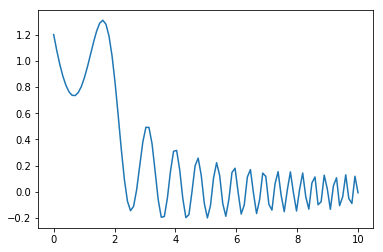

In [14]:
plt.plot(ts2, ys2)
plt.show()

## E funções auxiliares

- Dado um intervalo, e o número de pontos
- Dado um intervalo, e o tamanho do passo

In [15]:
def euler_npts(F, I, y0, npts, retpts=False):
    ### Resposta aqui

    ys = eulerexplicito(F, I[0], y0, ts[1:])
    if retpts:
        return ts, ys
    else:
        return ys

In [16]:
def euler_h(F, I, y0, h, retpts=False):
    ### Resposta aqui

    ys = eulerexplicito(F, I[0], y0, ts[1:])
    if retpts:
        return ts, ys
    else:
        return ys

## Observe-as funcionando

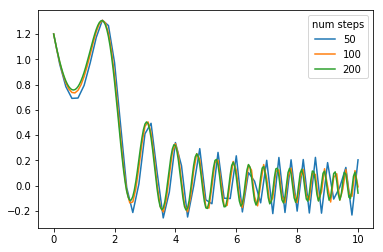

In [17]:
# Comentar
for n in [50,100,200]:
    ts, ys = euler_npts(F, [0,10], 1.2, n, retpts=True)
    plt.plot(ts, ys, label=str(n))
plt.legend(title='num steps')
plt.show()

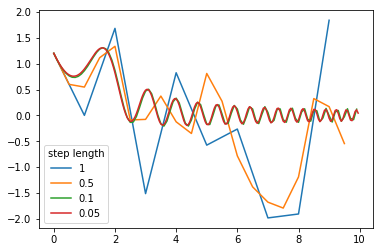

In [19]:
for h in [1,0.5,0.1,0.05]:
    ts, ys = euler_h(F, [0,10], 1.2, h, retpts=True)
    plt.plot(ts, ys, label=str(h))
plt.legend(title='step length')
plt.show()